## Time to get your hands dirty. The HR diagram
### Tasks
- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?



### For later: come back to this assignment after lecture 20
- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

In [1]:
import urllib.request
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#Readind the data with pandas
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
df_stars = pd.read_csv("stars.csv")

In [3]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [4]:
name = df_stars['Star type'].copy()

In [6]:
#Changing the label of the star type
le = LabelEncoder()
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

[0 1 2 3 4 5]


## HR diagram

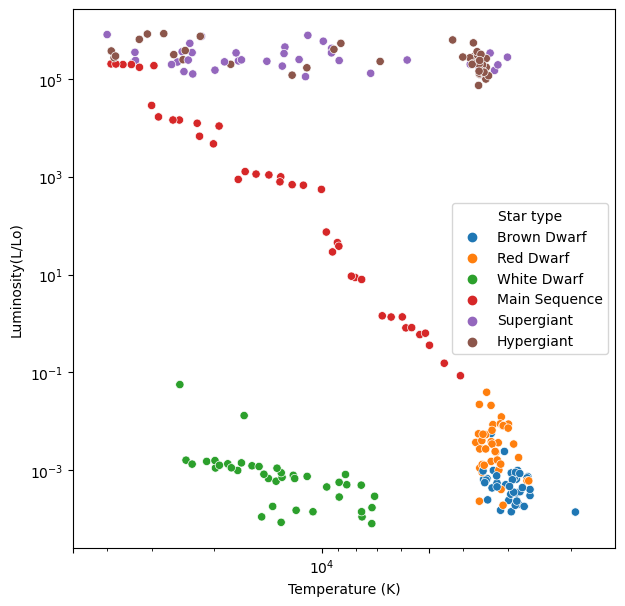

In [7]:
#Reproducing the HR diagram
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=name)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

## PCA without standardization 

In [8]:
new_df_stars = df_stars.drop(columns=['Star color', 'Spectral Class', 'Star type'])
X = np.array(new_df_stars)

In [9]:
pca = PCA()  #Defing the PCA estimator object
pca.fit(X)  #Fitting the data
evals = pca.explained_variance_ratio_  #Computing the eigenvalues
eigenvectors = np.asarray(pca.components_, dtype=float)  #Computing the eigenvectors

In [10]:
X_pca = pca.transform(X)  #Trasforming the data
df_pca = pd.DataFrame(data=X_pca[:,:2], columns=['Component 0', 'Component 1'])  #Considering only the first two components
df_pca.insert(2, 'Name', name)
df_pca

,Component 0,Component 1,Name
0,-107320.920994,-5177.121468,Brown Dwarf
1,-107321.468657,-5203.114552,Brown Dwarf
2,-107330.746256,-5644.998477,Brown Dwarf
3,-107326.548341,-5445.051101,Brown Dwarf
4,-107344.620346,-6305.825280,Brown Dwarf
...,...,...,...
235,268181.053543,22811.150375,Hypergiant
236,727121.082050,5082.074632,Hypergiant
237,430176.127218,-10704.322597,Hypergiant
238,297660.530920,-7515.345816,Hypergiant


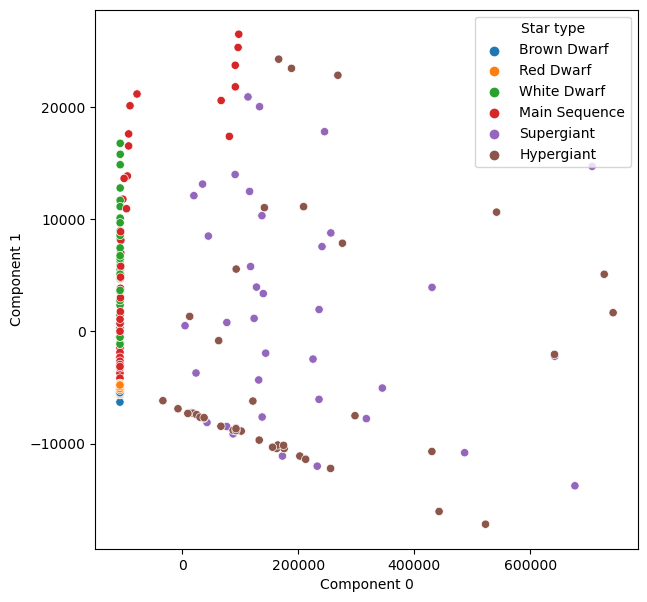

In [11]:
#Plotting the results
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_pca, x='Component 0', y='Component 1', hue=name)
plt.show()

It easy to see that without scaling our data the result is terrible.

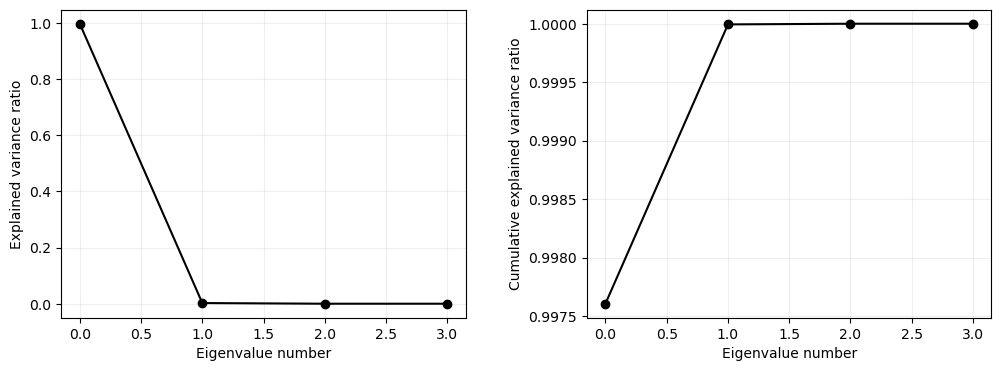

In [12]:
#Plotting the scree plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(np.arange(len(evals)), evals, color = 'black', marker='o')
axs[0].set_xlabel('Eigenvalue number')
axs[0].set_ylabel('Explained variance ratio')
axs[0].grid(alpha=0.2)

axs[1].plot(np.arange(len(evals)), evals.cumsum(), color = 'black', marker='o')
axs[1].set_xlabel('Eigenvalue number')
axs[1].set_ylabel('Cumulative explained variance ratio')
axs[1].grid(alpha=0.2)

plt.subplots_adjust(wspace=0.3)
plt.show()

In [13]:
print('The information contained in the first two components of the PCA is %0.2f%%' %((evals[0]+evals[1])*100))

The information contained in the first two components of the PCA is 100.00%


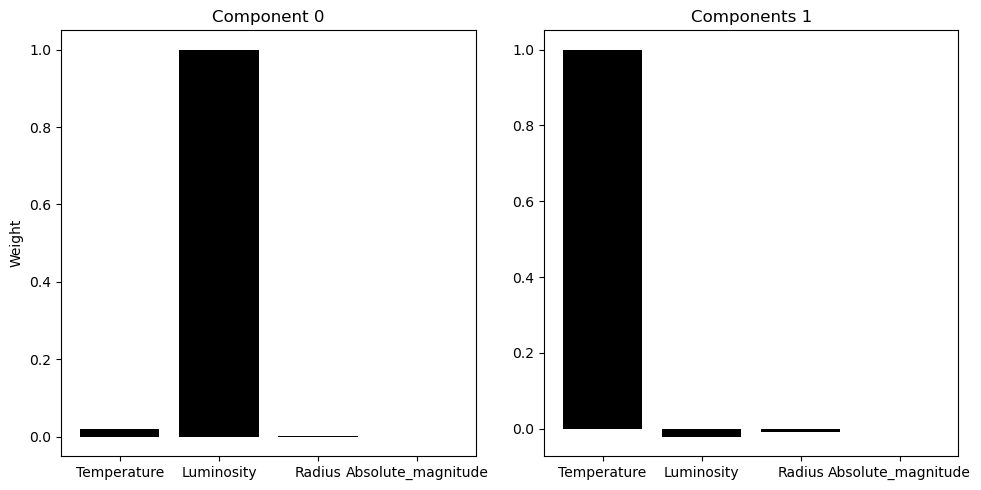

In [14]:
#Plotting the weights of the features on the PCA components
fig, axs = plt.subplots(1,2, figsize=(10,5))
labels = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']

axs[0].bar(labels, pca.components_[0], color='black')
axs[0].set_ylabel('Weight')
axs[0].set_title('Component 0')

axs[1].bar(labels, pca.components_[1], color='black')
axs[1].set_title('Components 1')

fig.tight_layout() 
plt.show()

Without scaling our data the luminosity has a huge weight on the first component, instead the temperature has a huge weight in the second component. This is due to the difference on the order of magnitude of the features. Therefore, we have to scale our data to obtain a better result and a better distribution of weights on the PCA components.

## PCA with standardization 

In [15]:
#Scaling the data
scaler = preprocessing.StandardScaler()
X_scaler = scaler.fit_transform(X)

In [16]:
pca.fit(X_scaler)  #Fitting the data
evals_scaler = pca.explained_variance_ratio_  #Computing the eigenvalues
eigenvectors_scaler = np.asarray(pca.components_, dtype=float)  #Computing the eigenvectors

In [17]:
X_pca_scaler = pca.transform(X_scaler)  #Transforming the data
df_pca = pd.DataFrame(data=X_pca_scaler[:, :2], columns=['Component 0', 'Component 1'])  #Considering the first two components
df_pca.insert(2, 'Name', name)
df_pca

,Component 0,Component 1,Name
0,-1.476090,-0.343211,Brown Dwarf
1,-1.503654,-0.343857,Brown Dwarf
2,-1.636288,-0.374996,Brown Dwarf
3,-1.515309,-0.364557,Brown Dwarf
4,-1.735919,-0.427500,Brown Dwarf
...,...,...,...
235,3.703168,1.177682,Hypergiant
236,4.729798,0.667365,Hypergiant
237,3.211102,-1.489990,Hypergiant
238,2.553545,-1.117109,Hypergiant


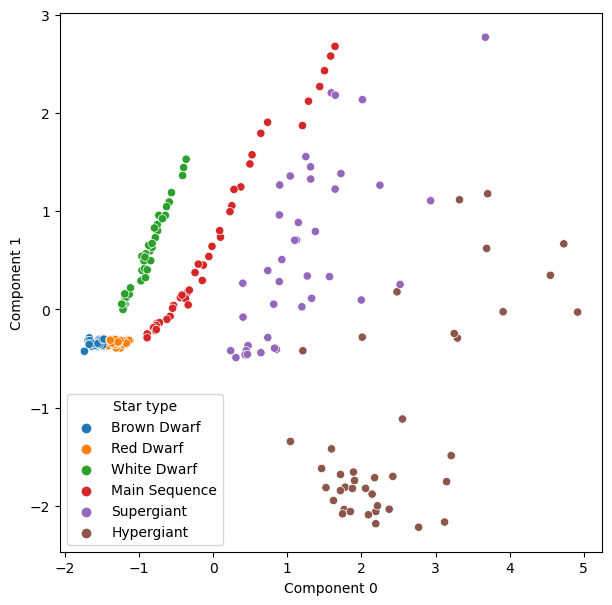

In [18]:
#Plotting the results
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_pca, x='Component 0', y='Component 1', hue=name)
plt.show()

It is much better now.

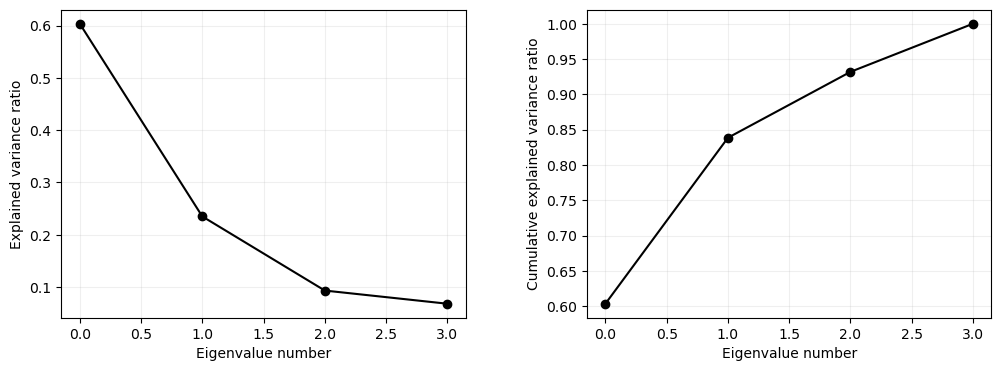

In [19]:
#Plotting the scree plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(np.arange(len(evals_scaler)), evals_scaler, color = 'black', marker='o')
axs[0].set_xlabel('Eigenvalue number')
axs[0].set_ylabel('Explained variance ratio')
axs[0].grid(alpha=0.2)

axs[1].plot(np.arange(len(evals_scaler)), evals_scaler.cumsum(), color = 'black', marker='o')
axs[1].set_xlabel('Eigenvalue number')
axs[1].set_ylabel('Cumulative explained variance ratio')
axs[1].grid(alpha=0.2)

plt.subplots_adjust(wspace=0.3)
plt.show()

In [20]:
print('The information contained in the first two components of the PCA is %0.2f%%' %((evals_scaler[0]+evals_scaler[1])*100))

The information contained in the first two components of the PCA is 83.86%


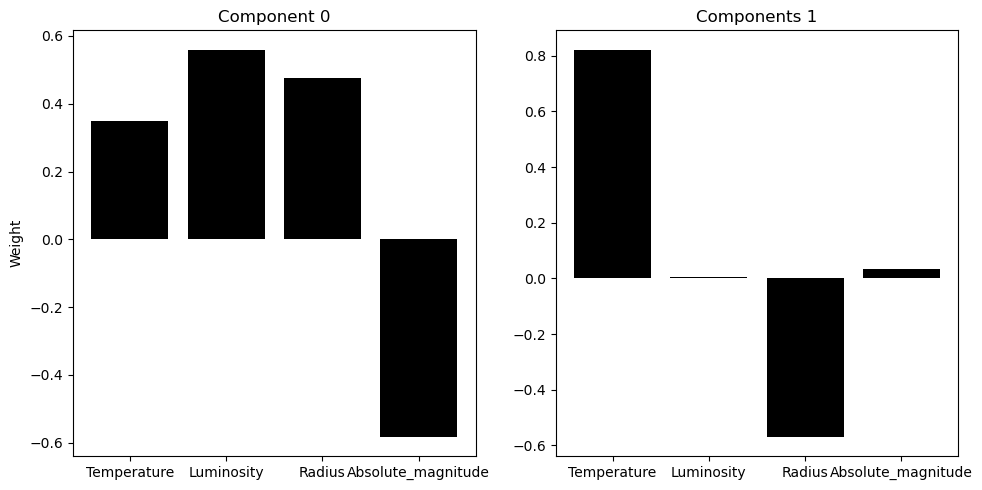

In [21]:
#Plotting the weights of the features on the PCA components
fig, axs = plt.subplots(1,2, figsize=(10,5))
labels = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']

axs[0].bar(labels, pca.components_[0], color='black')
axs[0].set_ylabel('Weight')
axs[0].set_title('Component 0')

axs[1].bar(labels, pca.components_[1], color='black')
axs[1].set_title('Components 1')

fig.tight_layout() 
plt.show()

Now the weights are more distributed.

## Classification

In [22]:
#Splitting the data in training and test data
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:, :2].to_numpy(), df_stars['Star type'], test_size=0.3, random_state=42)

In [23]:
#Performing Cross Validation to finf the best depth of the decision tree
depthrange = np.arange(1, 11)
k = 5
grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state = 42),
                    {'max_depth': depthrange}, cv= k)
grid.fit(X_train, y_train)
best_depth = grid.best_params_['max_depth']
print(best_depth)

7


In [24]:
#Using a decisiom Tree to classifie the data
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state = 42)  #Defining the Decision Tree estimator object
dtc.fit(X_train, y_train)  #Fitting our training data
y_pred = dtc.predict(X_test)  #Predicting on test data
confusion = confusion_matrix(y_test, y_pred)  #Computing the confusion matrix
accuracy = accuracy_score(y_test, y_pred)  #Computing the accuracy, it tells us the fraction of data correctly identified.

In [25]:
#Printing the results
print('Accuracy: %f%%' % (accuracy*100))
print('\nConfusion matrix:')
print(confusion)

Accuracy: 94.444444%

Confusion matrix:
[[14  0  0  0  0  0]
 [ 0 14  0  0  1  0]
 [ 0  0  9  0  1  0]
 [ 0  0  0 12  0  0]
 [ 0  2  0  0  9  0]
 [ 0  0  0  0  0 10]]
